* Сгенерируем данные
* Разобъем их на кластеры с помощью AgglomerativeClustering
* Разобъем эти же данные на кластеры с помощью DBSCAN
* Определим оптимальное число кластеров в этих данных
* Применим оба алгоритма к реальному примеру

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles, make_classification
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# AgglomerativeClustering

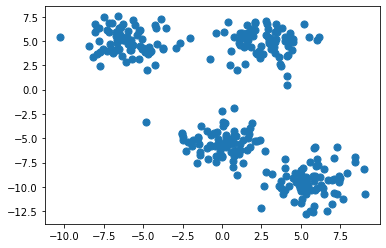

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

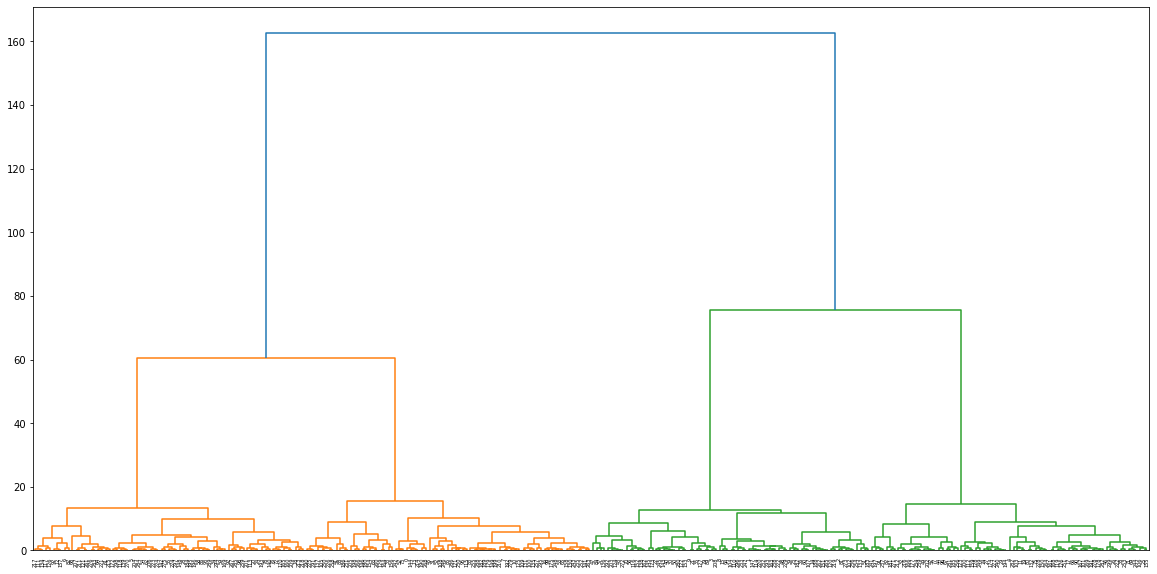

In [3]:
plt.figure(figsize=(20,10))
linkage_ = linkage(X, method='ward')
dendrogram_ = dendrogram(linkage_)

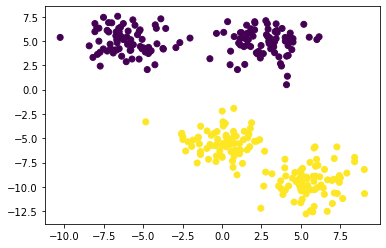

In [4]:
agg = AgglomerativeClustering(n_clusters=2).fit(X)
labels = agg.labels_

plt.scatter(X[:,0], X[:,1], c=labels);

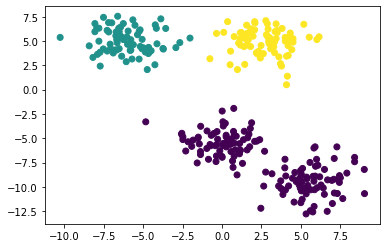

In [5]:
agg = AgglomerativeClustering(n_clusters=3).fit(X)
labels = agg.labels_

plt.scatter(X[:,0], X[:,1], c=labels);

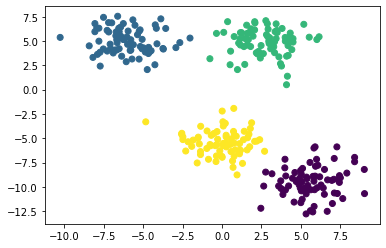

In [6]:
agg = AgglomerativeClustering(n_clusters=4).fit(X)
labels = agg.labels_

plt.scatter(X[:,0], X[:,1], c=labels);

### силуэтный коэффициент

In [7]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 205.10it/s]


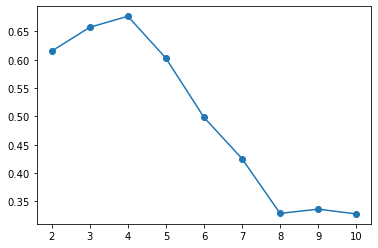

In [9]:
plt.plot(range(2,11), silhouette, marker='o');

## Сложные формы данных

In [10]:
def agg_clustering(n_clusters, X):
    agg = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
    labels = agg.labels_
    
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.title(str(n_clusters)+' кластера')
    plt.show();

### two moons

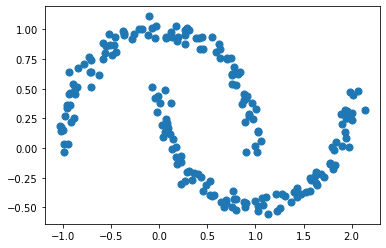

In [11]:
X, y = make_moons(200, noise=.05, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

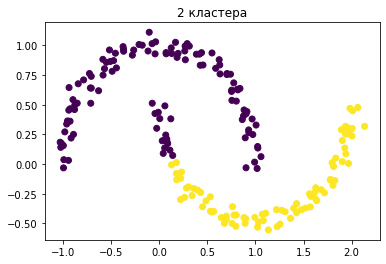

In [12]:
agg_clustering(2,X)

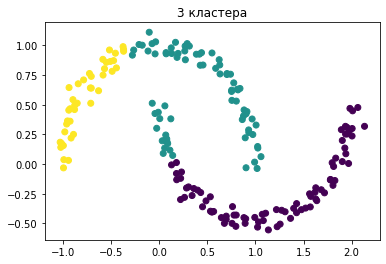

In [13]:
agg_clustering(3,X)

In [14]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 291.11it/s]


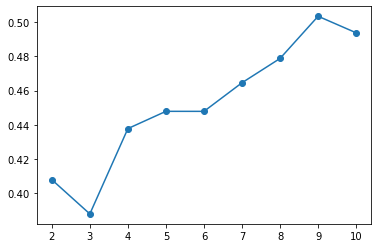

In [15]:
plt.plot(range(2,11), silhouette, marker='o');

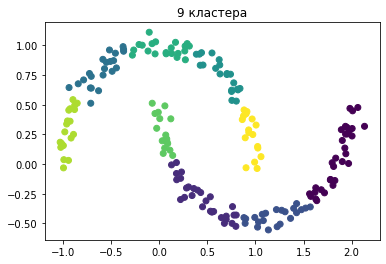

In [16]:
agg_clustering(9,X)

### circles

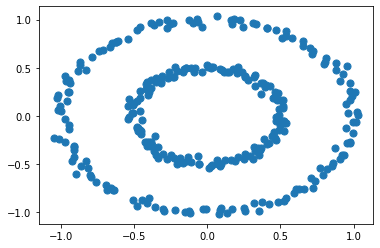

In [17]:
X, y = make_circles(n_samples=300, noise=0.03, random_state=10, factor=0.5)
plt.scatter(X[:, 0], X[:, 1], s=50);

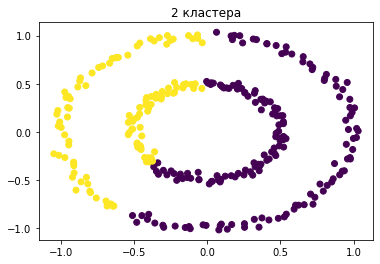

In [18]:
agg_clustering(2,X)

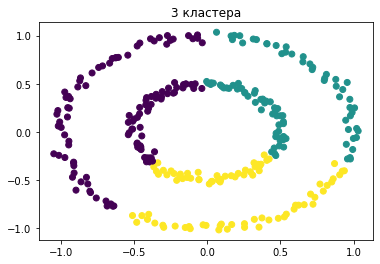

In [19]:
agg_clustering(3,X)

In [20]:
silhouette = []
for i in tqdm(range(2,21)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 186.78it/s]


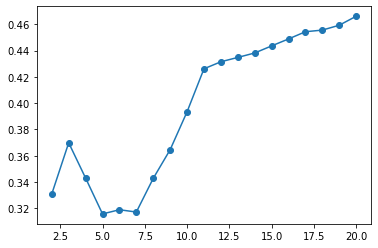

In [21]:
plt.plot(range(2,21), silhouette, marker='o');

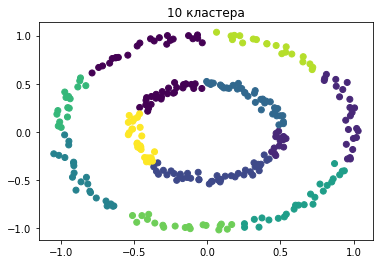

In [22]:
agg_clustering(10,X)

### Anisotropicly Distributed

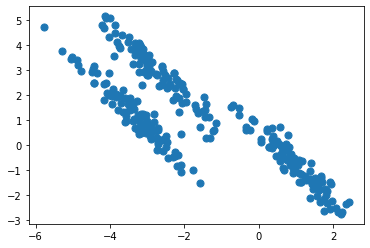

In [23]:
X, y_true = make_blobs(n_samples=300, centers=3, random_state=170)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)
plt.scatter(X[:, 0], X[:, 1], s=50);

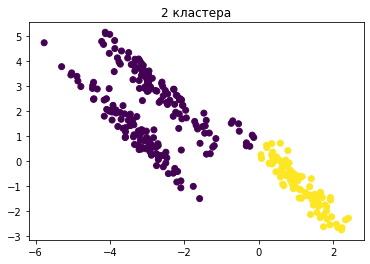

In [24]:
agg_clustering(2,X)

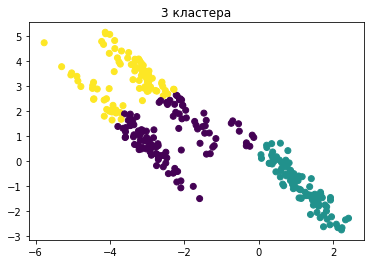

In [25]:
agg_clustering(3,X)

In [26]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 173.54it/s]


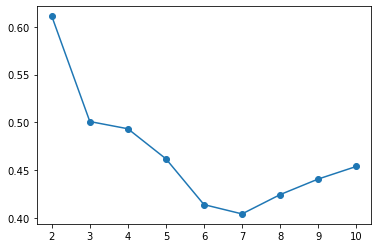

In [27]:
plt.plot(range(2,11), silhouette, marker='o');

# DBSCAN

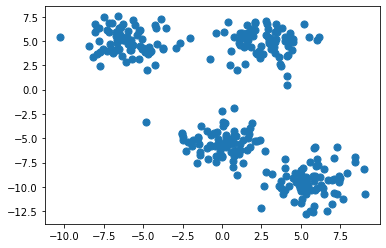

In [28]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [30]:
dbscan = DBSCAN().fit(X)
labels = dbscan.labels_

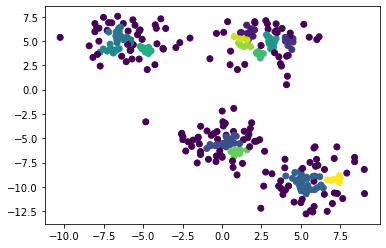

In [31]:
plt.scatter(X[:,0], X[:,1], c=labels);

In [32]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

In [33]:
uniq_labels = np.unique(labels)
uniq_labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

In [34]:
n_clusters = len(uniq_labels[uniq_labels != -1])
n_clusters

13

кластеров: 13


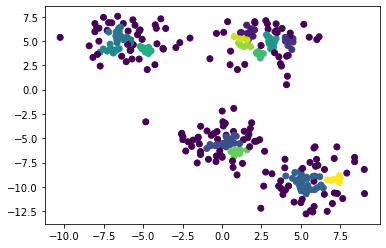

In [35]:
dbscan = DBSCAN().fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'кластеров: {n_clusters}')
plt.scatter(X[:,0], X[:,1], c=labels);

кластеров: 4


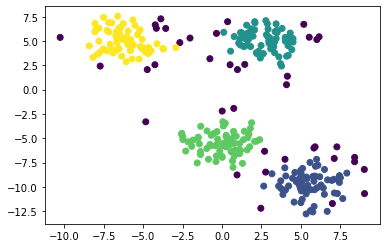

In [37]:
dbscan = DBSCAN(eps=1, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'кластеров: {n_clusters}')
plt.scatter(X[:,0], X[:,1], c=labels);

кластеров: 0


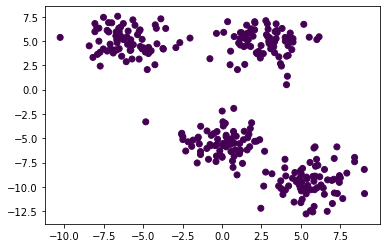

In [38]:
dbscan = DBSCAN(eps=0.1, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'кластеров: {n_clusters}')
plt.scatter(X[:,0], X[:,1], c=labels);

In [39]:
np.unique(labels)[np.unique(labels) != -1]

array([], dtype=int64)

In [40]:
np.delete(np.unique(labels), -1)

array([], dtype=int64)

### силуэтный коэффициент

In [41]:
silhouette = []
clusters = []
eps_range = np.arange(0.1,2,0.1)
for i in tqdm(eps_range):
    dbscan = DBSCAN(eps=i).fit(X)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(X, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 232.34it/s]


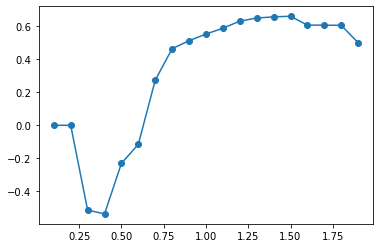

In [42]:
plt.plot(eps_range, silhouette, marker='o');

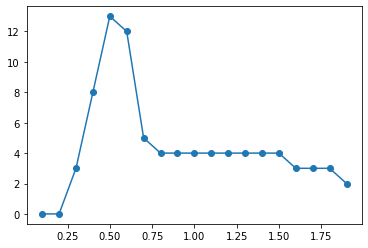

In [43]:
plt.plot(eps_range, clusters, marker='o');

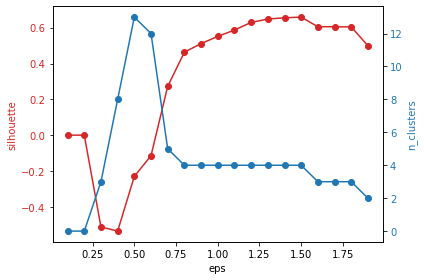

In [44]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(eps_range, silhouette, marker='o', color=color)
ax1.set_xlabel('eps')
ax1.set_ylabel('silhouette', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(eps_range, clusters, marker='o', color=color)
ax2.set_ylabel('n_clusters', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Сложные формы данных

In [45]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

### two moons

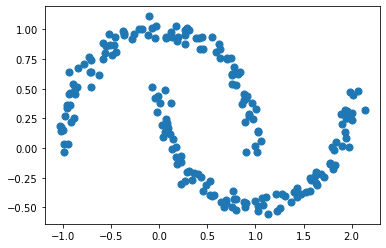

In [46]:
X, y = make_moons(200, noise=.05, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 488.49it/s]


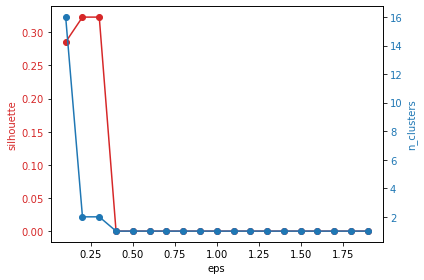

In [47]:
#eps_range = np.arange(0.01,0.3,0.05)
eps_range = np.arange(0.1,2,0.1)
dbscan_clustering(eps_range, X)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 429.74it/s]


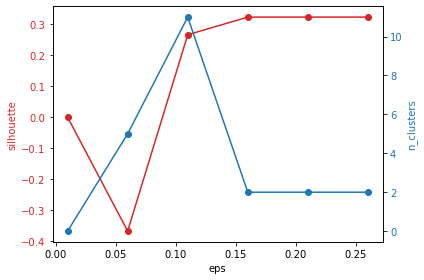

In [48]:
eps_range = np.arange(0.01,0.3,0.05)
dbscan_clustering(eps_range, X)

кластеров: 2


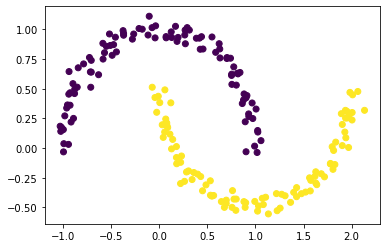

In [49]:
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'кластеров: {n_clusters}')
plt.scatter(X[:,0], X[:,1], c=labels);

### circles

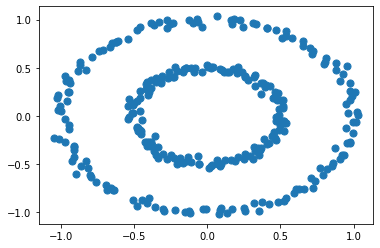

In [50]:
X, y = make_circles(n_samples=300, noise=0.03, random_state=10, factor=0.5)
plt.scatter(X[:, 0], X[:, 1], s=50);

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.67it/s]


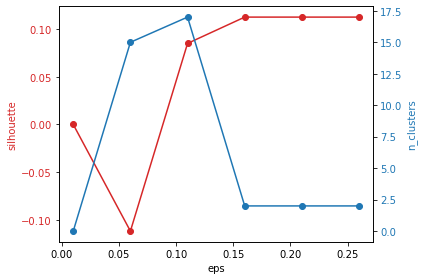

In [51]:
eps_range = np.arange(0.01,0.3,0.05)
dbscan_clustering(eps_range, X)

кластеров: 2


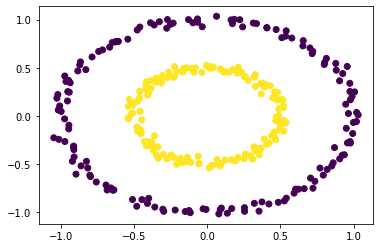

In [52]:
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'кластеров: {n_clusters}')
plt.scatter(X[:,0], X[:,1], c=labels);

### Anisotropicly Distributed

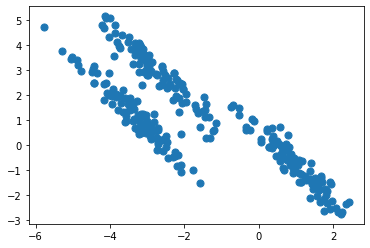

In [53]:
X, y_true = make_blobs(n_samples=300, centers=3, random_state=170)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)
plt.scatter(X[:, 0], X[:, 1], s=50);

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 270.99it/s]


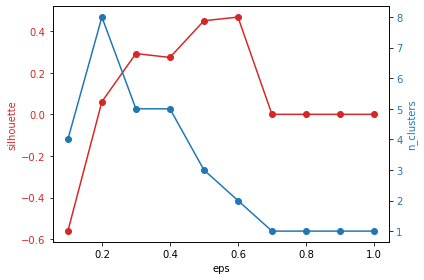

In [54]:
eps_range = np.arange(0.1,1.1,0.1)
dbscan_clustering(eps_range, X)

кластеров: 2


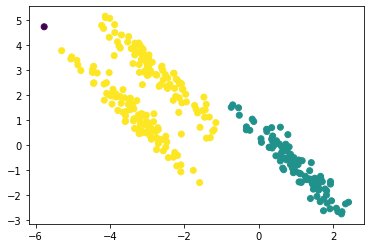

In [55]:
dbscan = DBSCAN(eps=0.6, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'кластеров: {n_clusters}')
plt.scatter(X[:,0], X[:,1], c=labels);

кластеров: 3


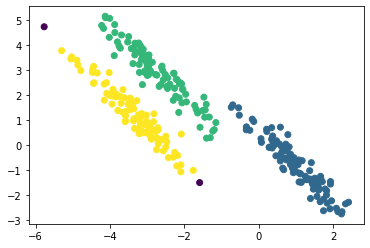

In [56]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'кластеров: {n_clusters}')
plt.scatter(X[:,0], X[:,1], c=labels);

кластеров: 1


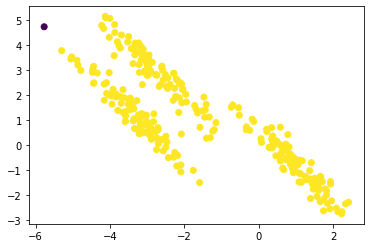

In [57]:
dbscan = DBSCAN(eps=0.8, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'кластеров: {n_clusters}')
plt.scatter(X[:,0], X[:,1], c=labels);

# Кластеризация на реальных данных

https://www.kaggle.com/unsdsn/world-happiness

In [58]:
data = pd.read_csv('data/2019.csv')

In [59]:
data.shape

(156, 9)

In [60]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [62]:
data['Overall rank'].nunique()

156

In [63]:
data.drop('Overall rank', axis=1, inplace=True)

In [64]:
data['Country or region'].nunique()

156

In [65]:
country = data['Country or region']

In [66]:
data.drop('Country or region', axis=1, inplace=True)

In [67]:
data.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


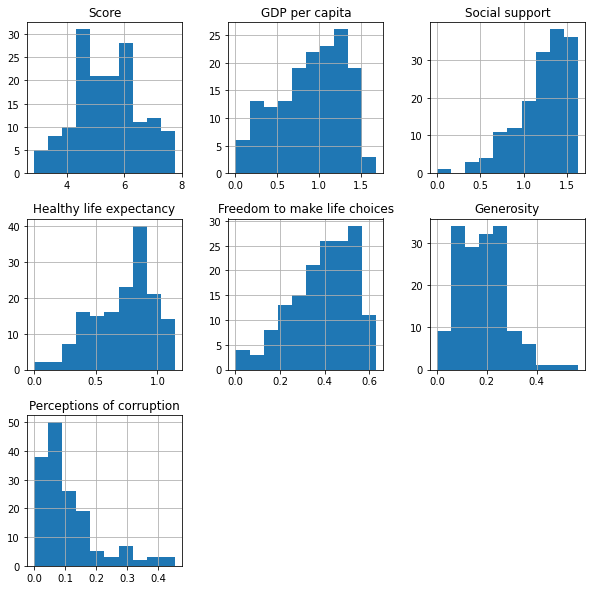

In [68]:
data.hist(figsize=(10,10));

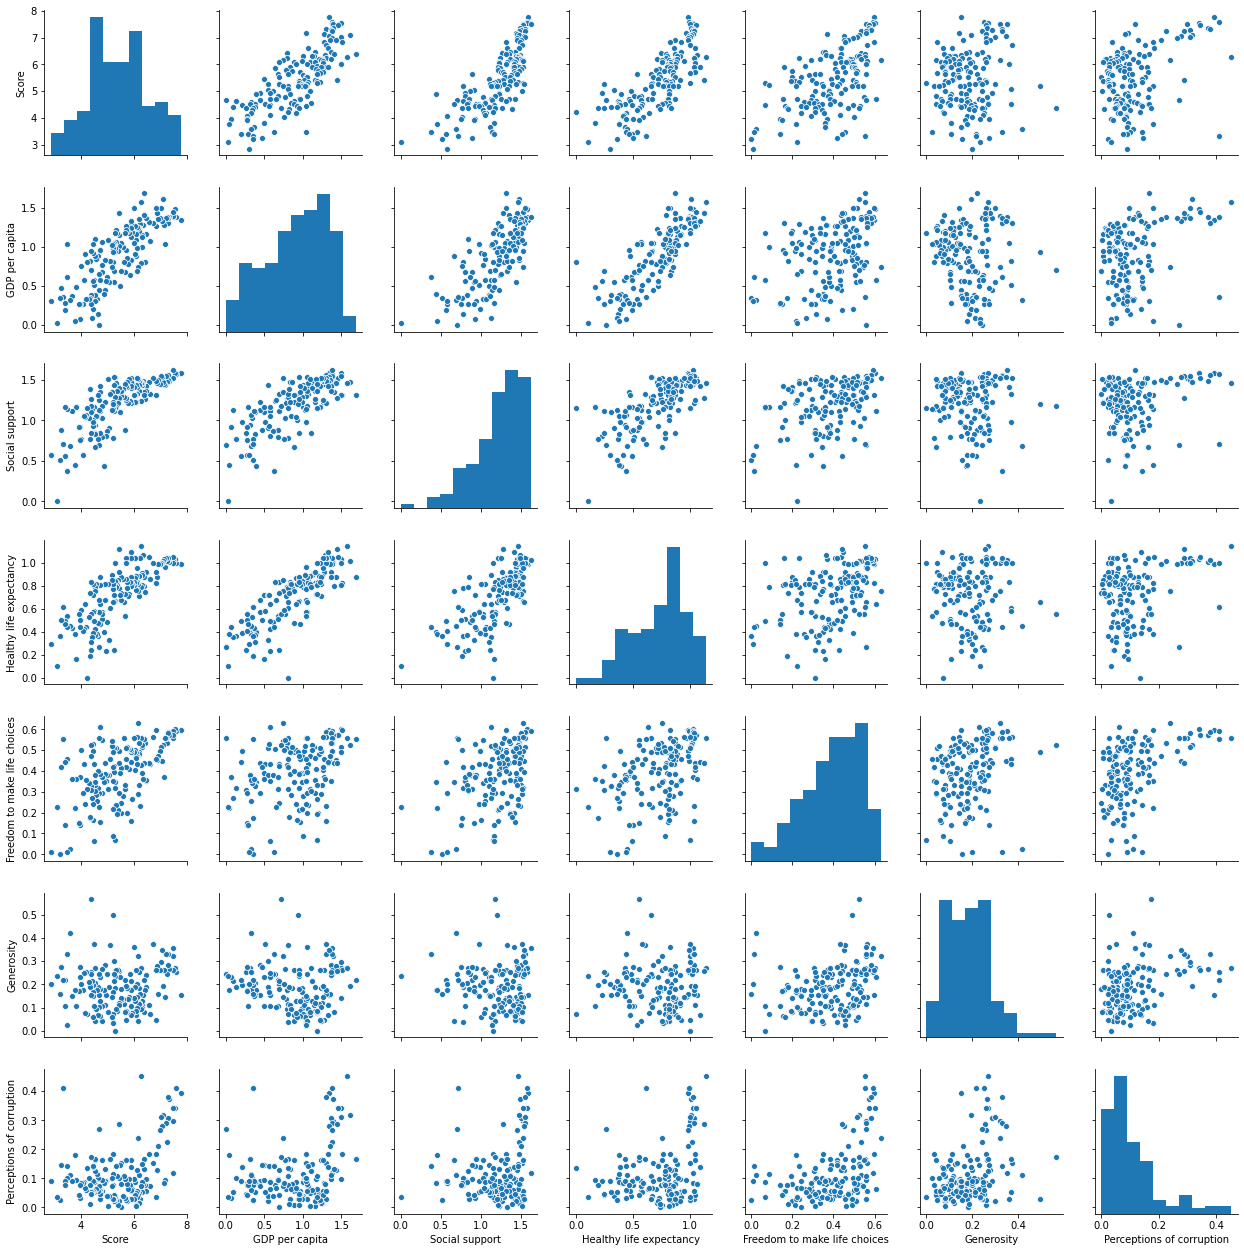

In [69]:
sns.pairplot(data);

## 1. Корреляция

In [70]:
corr = data.corr()

In [71]:
mask = np.triu(np.ones_like(corr, dtype=bool))

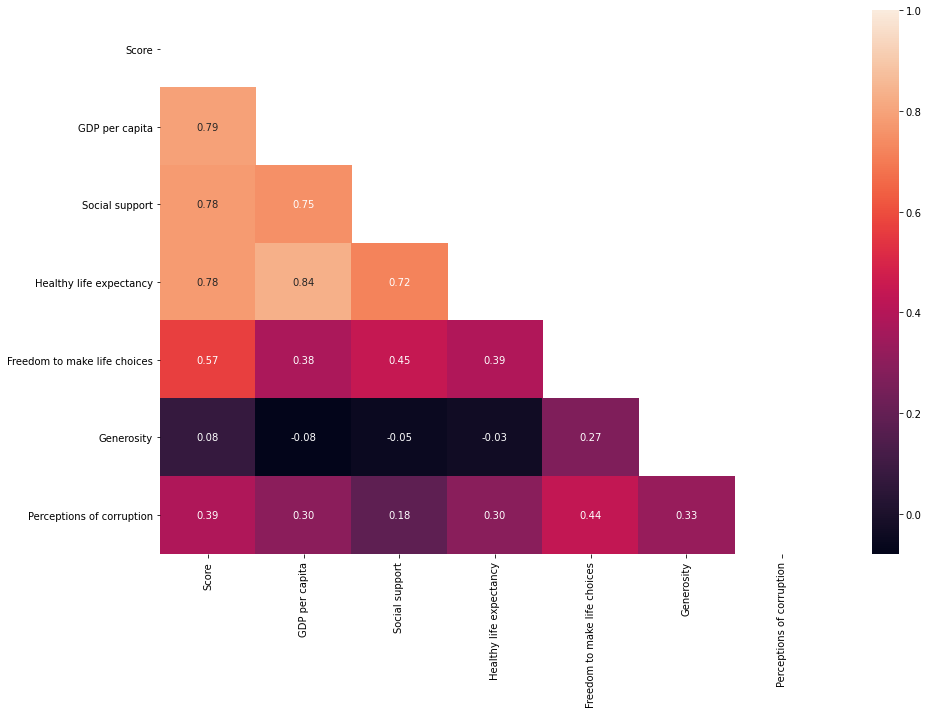

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

# 2. Нормализация

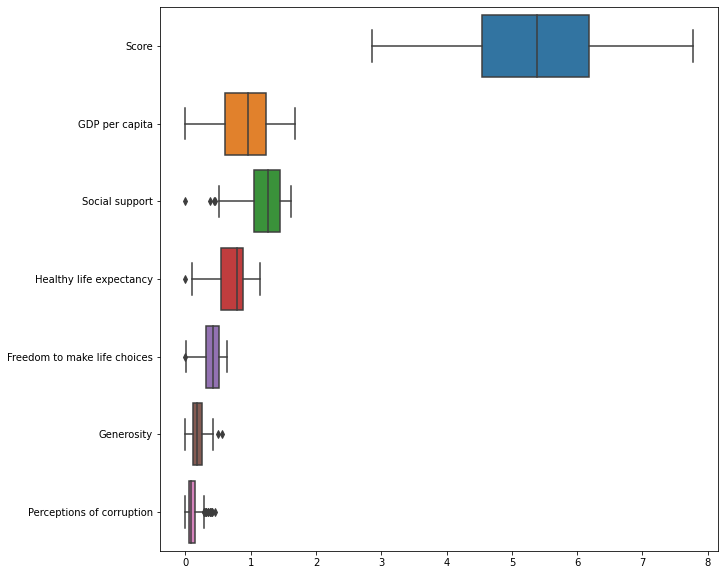

In [73]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient='h');

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()

In [76]:
X_scaled = scaler.fit_transform(data)

In [77]:
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)

In [78]:
data_scaled.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


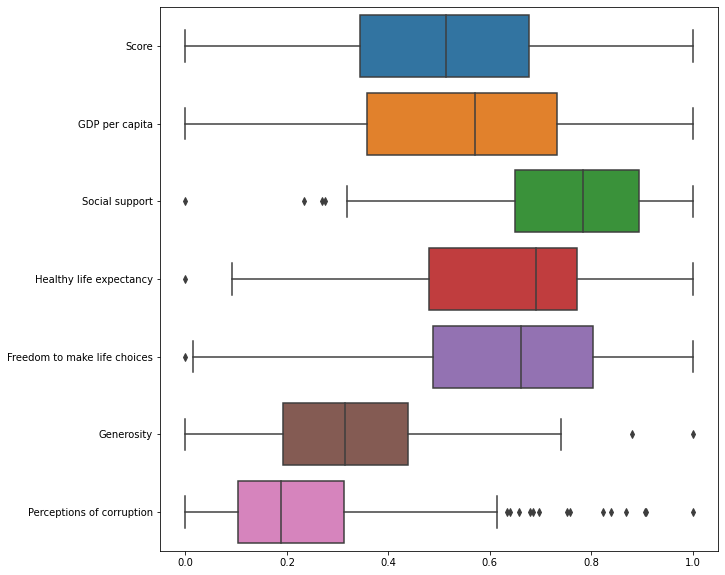

In [79]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_scaled, orient='h');

# 3. Снижение размерности для визуализации

In [80]:
from sklearn.manifold import TSNE

In [81]:
tsne = TSNE(n_components=2, random_state=10)

In [82]:
X_scaled.shape

(156, 7)

In [83]:
X_tsne = tsne.fit_transform(X_scaled)

In [84]:
X_tsne.shape

(156, 2)

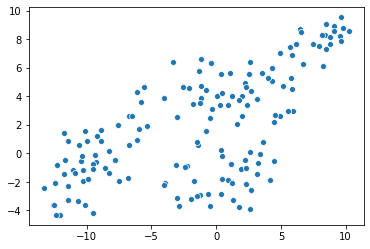

In [85]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1]);

# 4. Кластеризация

## 4.1 AgglomerativeClustering

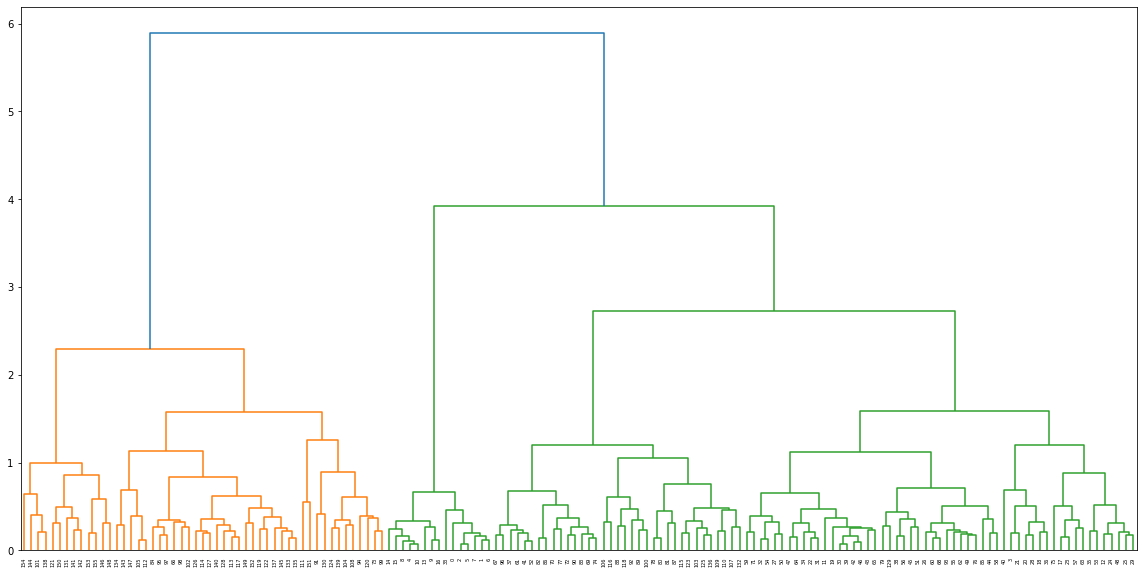

In [86]:
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

In [87]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 333.88it/s]


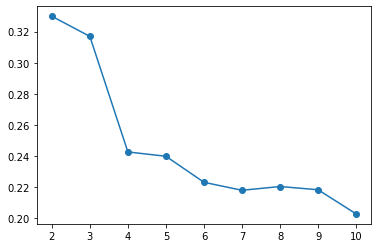

In [88]:
plt.plot(range(2,11), silhouette, marker='o');

In [89]:
agg = AgglomerativeClustering(n_clusters=3).fit(X_scaled)
labels = agg.labels_

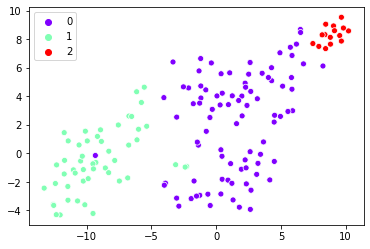

In [90]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

In [91]:
data['labels'] = labels

In [92]:
data['labels'].value_counts(normalize=True)

0    0.576923
1    0.326923
2    0.096154
Name: labels, dtype: float64

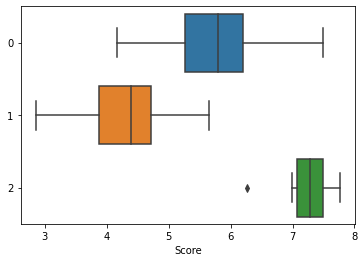

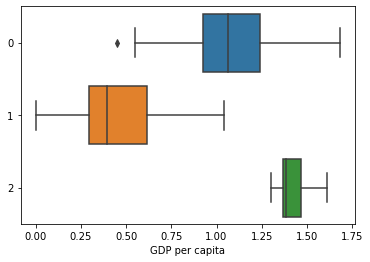

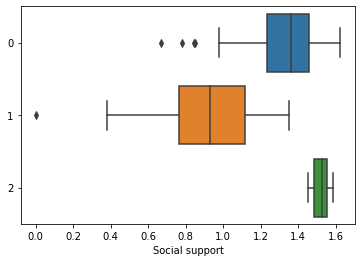

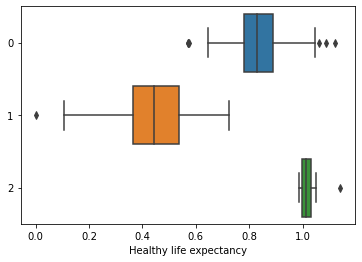

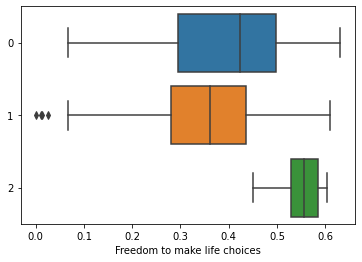

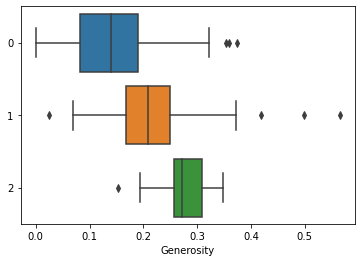

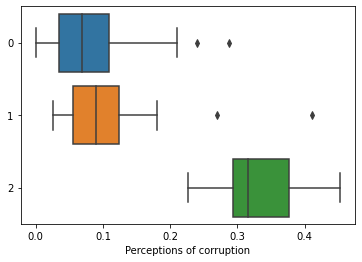

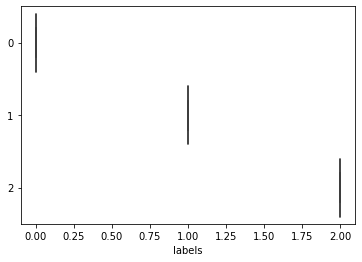

In [93]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.show();

In [94]:
data.groupby('labels').median().T.round(2)

labels,0,1,2
Score,5.79,4.39,7.28
GDP per capita,1.06,0.39,1.38
Social support,1.36,0.93,1.53
Healthy life expectancy,0.83,0.44,1.01
Freedom to make life choices,0.42,0.36,0.56
Generosity,0.14,0.21,0.27
Perceptions of corruption,0.07,0.09,0.32


## 4.1 DBSCAN

100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 458.08it/s]


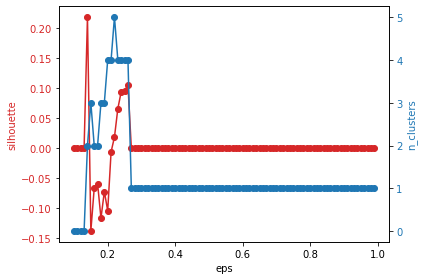

In [95]:
eps_range = np.arange(0.1,1,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|█████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 398.48it/s]


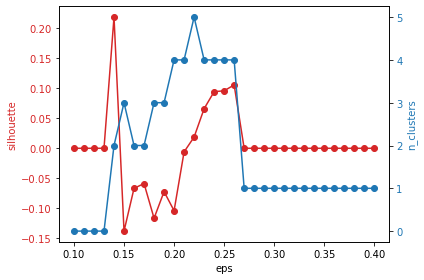

In [96]:
eps_range = np.arange(0.1,0.4,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 455.77it/s]


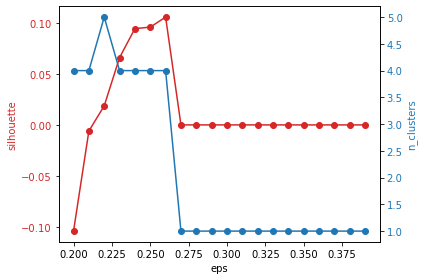

In [97]:
eps_range = np.arange(0.2,0.4,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.68it/s]


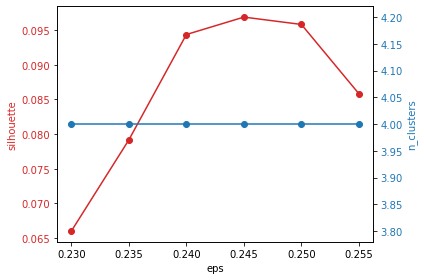

In [98]:
eps_range = np.arange(0.23,0.26,0.005)
dbscan_clustering(eps_range, X_scaled)

In [99]:
from sklearn.neighbors import NearestNeighbors

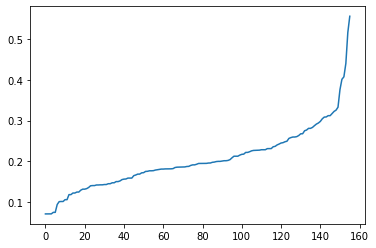

In [100]:
neighbors = NearestNeighbors(n_neighbors=5)
nbrs = neighbors.fit(X_scaled)
distance, indices = nbrs.kneighbors(X_scaled)

distance = np.sort(distance, axis=0)
distance = distance[:,1]
plt.plot(distance)

In [101]:
dbscan = DBSCAN(eps=0.245).fit(X_scaled)
labels = dbscan.labels_

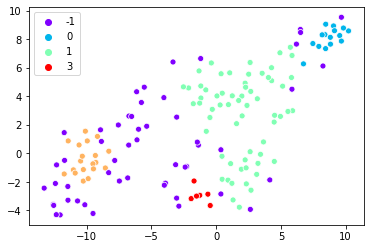

In [102]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

In [103]:
data['labels'] = labels

In [104]:
data['labels'].value_counts(normalize=True)

 1    0.403846
-1    0.339744
 2    0.121795
 0    0.096154
 3    0.038462
Name: labels, dtype: float64

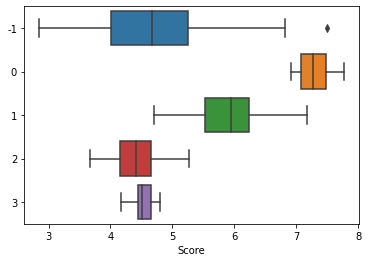

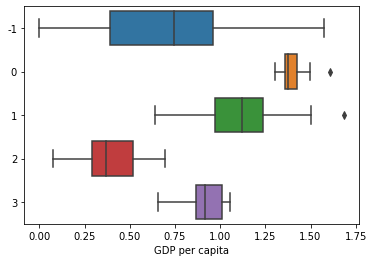

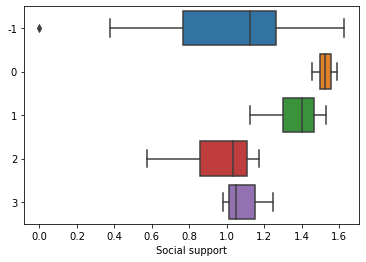

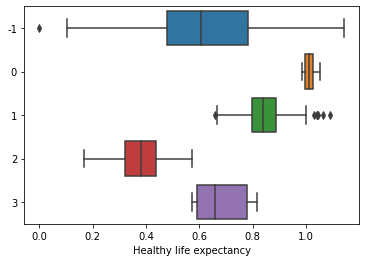

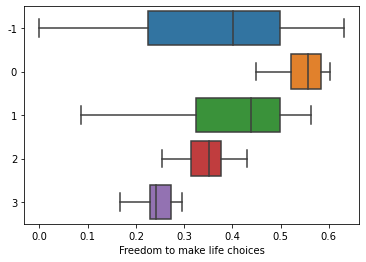

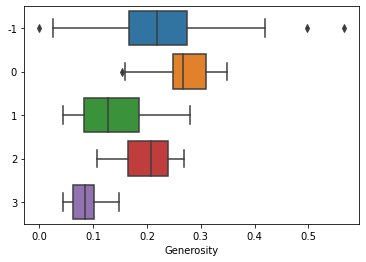

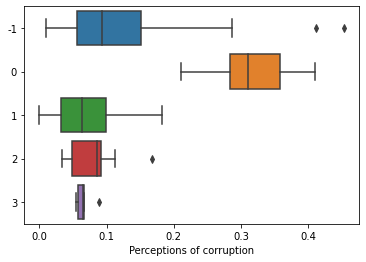

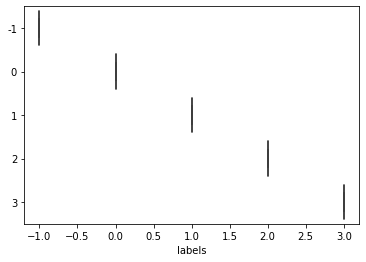

In [105]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.show();

In [106]:
data.groupby('labels').median().T.round(2)

labels,-1,0,1,2,3
Score,4.67,7.28,5.94,4.42,4.51
GDP per capita,0.74,1.38,1.12,0.37,0.92
Social support,1.12,1.53,1.40,1.03,1.05
Healthy life expectancy,0.60,1.01,0.84,0.38,0.66
Freedom to make life choices,0.40,0.56,0.44,0.35,0.24
Generosity,0.22,0.27,0.13,0.21,0.09
Perceptions of corruption,0.09,0.31,0.06,0.08,0.06
